# ETHBUSD Market Analysis + Prediction using LSTM

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

1) What was the change in price of the stock over time?
2) What was the daily return of the stock on average?
3) What was the moving average of the various stocks?
4) What was the correlation between different stocks'?
5) How much value do we put at risk by investing in a particular stock?
6) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

## 1) Data Preparation and Visualization

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

In [68]:
df = pd.read_csv('ETHBUSD.csv')

In [69]:
df.drop(["index"], inplace=True, axis=1)

In [70]:
df.head()

,Open time,Open,High,Low,Close,Volume
0,2019-12-31 19:00:00,128.61,128.61,128.47,128.47,8.14441
1,2019-12-31 19:03:00,128.47,128.47,128.47,128.47,0.00000
2,2019-12-31 19:06:00,128.47,128.47,128.47,128.47,0.00000
3,2019-12-31 19:09:00,128.47,128.47,128.47,128.47,0.00000
4,2019-12-31 19:12:00,128.21,128.21,128.21,128.21,0.09151


In [71]:
df.tail()

,Open time,Open,High,Low,Close,Volume
610019,2023-06-26 06:57:00,1891.63,1898.50,1891.63,1896.43,506.3571
610020,2023-06-26 07:00:00,1896.43,1900.75,1896.43,1900.75,254.4964
610021,2023-06-26 07:03:00,1900.76,1901.01,1898.40,1898.60,372.6204
610022,2023-06-26 07:06:00,1898.53,1900.00,1897.17,1898.17,454.9128
610023,2023-06-26 07:09:00,1898.15,1898.21,1897.17,1897.73,62.6862


In [72]:
df.describe()

,Open,High,Low,Close,Volume
count,610024.000000,610024.000000,610024.000000,610024.000000,610024.000000
mean,1692.494823,1694.646711,1690.330014,1692.495122,509.347036
std,1182.830758,1184.336049,1181.307903,1182.827343,914.374794
min,88.930000,90.480000,85.670000,88.120000,0.000000
25%,463.477500,463.940000,462.957500,463.470000,84.675250
50%,1631.060000,1632.860000,1629.330000,1631.060000,246.317465
75%,2477.512500,2482.722500,2472.590000,2477.580000,570.745215
max,4862.200000,4867.360000,4854.740000,4861.170000,42558.838800


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610024 entries, 0 to 610023
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open time  610024 non-null  object 
 1   Open       610024 non-null  float64
 2   High       610024 non-null  float64
 3   Low        610024 non-null  float64
 4   Close      610024 non-null  float64
 5   Volume     610024 non-null  float64
dtypes: float64(5), object(1)
memory usage: 27.9+ MB


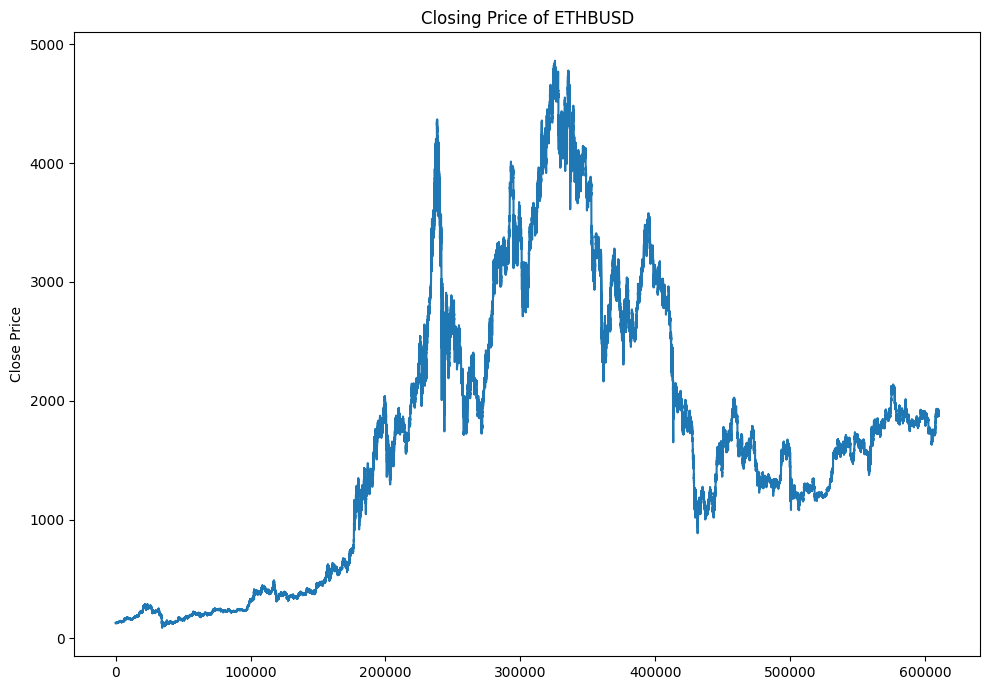

In [74]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 7))
df["Close"].plot()
plt.ylabel('Close Price')
plt.xlabel(None)
plt.title(f"Closing Price of ETHBUSD")
    
plt.tight_layout()

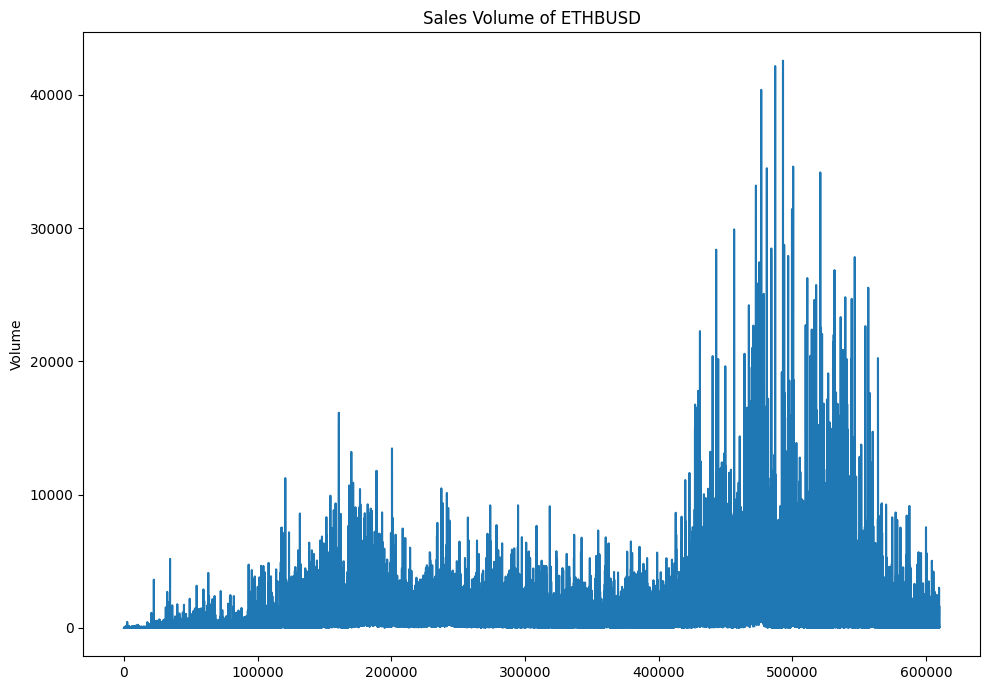

In [75]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 7))
df["Volume"].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of ETHBUSD")
    
plt.tight_layout()

## 2) Technical Indicators

In [76]:
df = df[-10000:]
df.reset_index(inplace=True)

In [77]:
df

,index,Open time,Open,High,Low,Close,Volume
0,600024,2023-06-05 11:12:00,1867.14,1867.42,1867.06,1867.42,15.4350
1,600025,2023-06-05 11:15:00,1867.42,1867.42,1866.03,1867.34,59.7746
2,600026,2023-06-05 11:18:00,1867.34,1867.78,1866.76,1867.78,34.9325
3,600027,2023-06-05 11:21:00,1867.78,1868.36,1867.62,1868.36,29.3403
4,600028,2023-06-05 11:24:00,1868.36,1868.77,1867.86,1868.57,29.6583
...,...,...,...,...,...,...,...
9995,610019,2023-06-26 06:57:00,1891.63,1898.50,1891.63,1896.43,506.3571
9996,610020,2023-06-26 07:00:00,1896.43,1900.75,1896.43,1900.75,254.4964
9997,610021,2023-06-26 07:03:00,1900.76,1901.01,1898.40,1898.60,372.6204
9998,610022,2023-06-26 07:06:00,1898.53,1900.00,1897.17,1898.17,454.9128


In [78]:
df.drop(["index"], inplace=True, axis=1)

In [79]:
# Adding Indicators

df['RSI'] = ta.rsi(df['Close'], length=15)
df['EMAF'] = ta.ema(df['Close'], length=20)
df['EMAM'] = ta.ema(df['Close'], length=100)
df['EMAS'] = ta.ema(df['Close'], length=150)

df['Target'] = df['Close'] - df.Open
df['Target'] = df['Target'].shift(-1)

df['TargetClass'] = [1 if df.Target[i] > 0 else 0 for i in range(len(df))]

df['TargetNextClose'] = df['Close'].shift(-1)

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['Volume', 'Open time'], axis=1, inplace=True)

In [80]:
data_set = df[200:]
pd.set_option('display.max_columns', None)

data_set.head(5)

,index,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
200,349,1814.80,1814.90,1814.79,1814.89,59.318925,1814.013240,1812.362438,1813.772805,0.23,1,1815.13
201,350,1814.90,1815.13,1814.65,1815.13,60.800762,1814.119598,1812.417241,1813.790781,0.53,1,1815.66
202,351,1815.13,1815.67,1815.12,1815.66,63.911113,1814.266303,1812.481454,1813.815539,0.14,1,1815.80
203,352,1815.66,1816.33,1815.58,1815.80,64.703752,1814.412370,1812.547168,1813.841823,2.45,1,1818.25
204,353,1815.80,1818.80,1815.59,1818.25,74.999403,1814.777858,1812.660095,1813.900209,1.04,1,1819.29


In [81]:
data_set.drop(["index"], axis=1, inplace=True)

/tmp/ipykernel_26689/3292710087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop(["index"], axis=1, inplace=True)


In [124]:
np.array(data_set["TargetNextClose"])[:10]

array([1815.13, 1815.66, 1815.8 , 1818.25, 1819.29, 1819.62, 1819.93,
       1819.77, 1819.03, 1818.26])

In [199]:
data_set[-5:]

,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
9845,1892.70,1893.55,1891.48,1891.63,78.398696,1883.985410,1881.307731,1883.033188,4.80,1,1896.43
9846,1891.63,1898.50,1891.63,1896.43,83.386865,1885.170609,1881.607181,1883.210629,4.32,1,1900.75
9847,1896.43,1900.75,1896.43,1900.75,86.412443,1886.654361,1881.986247,1883.442939,-2.16,0,1898.60
9848,1900.76,1901.01,1898.40,1898.60,78.763528,1887.792041,1882.315232,1883.643695,-0.36,0,1898.17
9849,1898.53,1900.00,1897.17,1898.17,77.297368,1888.780418,1882.629188,1883.836096,-0.42,0,1897.73


In [97]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)

In [155]:
data_set_scaled[0][-1]

0.6095701108854188

In [183]:
z = np.zeros((5,11))

In [184]:
z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [189]:
values_to_insert = data_set_scaled[-5:][:,3]

In [197]:
values_to_insert

array([0.86430688, 0.88029037, 0.8946755 , 0.88751623, 0.88608438])

In [191]:
z[:, 3] = values_to_insert

In [192]:
z

array([[0.        , 0.        , 0.        , 0.86430688, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.88029037, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.8946755 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.88751623, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.88608438, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [180]:
np.append(np.zeros((1,10)), data_set_scaled[0][-1])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.60957011])

In [196]:
sc.inverse_transform(z)[:,3]

array([1891.63, 1896.43, 1900.75, 1898.6 , 1898.17])

In [157]:
np.zeros((1,10)) + data_set_scaled[0][-1]

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [153]:
sc.inverse_transform(data_set_scaled[0].reshape(1, -1))

array([[1.81480000e+03, 1.81490000e+03, 1.81479000e+03, 1.81489000e+03,
        5.93189254e+01, 1.81401324e+03, 1.81236244e+03, 1.81377280e+03,
        2.30000000e-01, 1.00000000e+00, 1.81513000e+03]])

In [150]:
sc.inverse_transform(data_set_scaled[0:5][-1][0].reshape(1,-10))[0]

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,11)

In [54]:
X = []

backcandles = 30
print(data_set_scaled.shape[0])

for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])
X = np.moveaxis(X, [0],[2])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi, (len(yi),1))

print(X.shape)
print(y.shape)

9650
(9620, 30, 8)
(9620, 1)


In [87]:
X[0][0]

array([0.60848428, 0.59873389, 0.62555809, 0.60877094, 0.59223167,
       0.62085012, 0.6280895 , 0.63638663])

In [55]:
split_limit = int(len(X)*0.8)
print(split_limit)

X_train, X_test = X[:split_limit], X[split_limit:]
y_train, y_test = y[:split_limit], y[split_limit:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

7696
(7696, 30, 8)
(1924, 30, 8)
(7696, 1)
(1924, 1)
[[0.61536412]
 [0.61336619]
 [0.61646299]
 ...
 [0.92174753]
 [0.92231361]
 [0.92521062]]


In [56]:
import keras
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import LSTM, Dropout, Dense, Input, Activation, concatenate
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.callbacks import History
from keras import optimizers

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=100 , shuffle=True)

Epoch 1/100
514/514 [==============================] - 9s 14ms/step - loss: 0.0015
Epoch 2/100
514/514 [==============================] - 9s 18ms/step - loss: 1.4067e-04
Epoch 3/100
514/514 [==============================] - 8s 16ms/step - loss: 1.3385e-04
Epoch 4/100
514/514 [==============================] - 8s 16ms/step - loss: 1.1990e-04
Epoch 5/100
514/514 [==============================] - 9s 17ms/step - loss: 1.1710e-04
Epoch 6/100
514/514 [==============================] - 8s 16ms/step - loss: 1.1479e-04
Epoch 7/100
514/514 [==============================] - 8s 16ms/step - loss: 1.2031e-04
Epoch 8/100
514/514 [==============================] - 8s 16ms/step - loss: 1.1922e-04
Epoch 9/100
514/514 [==============================] - 8s 16ms/step - loss: 1.0870e-04
Epoch 10/100
514/514 [==============================] - 8s 16ms/step - loss: 1.1321e-04
Epoch 11/100
514/514 [==============================] - 8s 15ms/step - loss: 1.0265e-04
Epoch 12/100
514/514 [=======================

In [110]:
y_pred = model.predict(X_test)

for i in range(10):
    print(y_pred[i], y_test[i])

61/61 [==============================] - 0s 8ms/step
[0.9154271] [0.92674237]
[0.91920835] [0.92680896]
[0.920829] [0.92747494]
[0.9209405] [0.92314608]
[0.9215512] [0.92088176]
[0.9176816] [0.92444474]
[0.91521925] [0.92690886]
[0.9170751] [0.91911691]
[0.9192648] [0.92048217]
[0.9129957] [0.91855083]


array([[0.00304817, 0.00301832, 0.00302751, ..., 0.01420588, 0.91542709,
        0.00304827],
       [0.00306076, 0.00303079, 0.00304001, ..., 0.01426456, 0.91920835,
        0.00306086],
       [0.00306616, 0.00303613, 0.00304537, ..., 0.01428971, 0.920829  ,
        0.00306626],
       ...,
       [0.00291628, 0.00288773, 0.00289651, ..., 0.01359122, 0.87581813,
        0.00291638],
       [0.00296232, 0.00293331, 0.00294224, ..., 0.01380579, 0.88964492,
        0.00296242],
       [0.00294079, 0.00291199, 0.00292085, ..., 0.01370543, 0.88317764,
        0.00294089]])

In [117]:
sc.min_

array([-5.4344033 , -5.38530779, -5.37632702, -5.43461756, -0.12378371,
       -5.66070251, -5.92895657, -6.04001591,  0.51365611,  0.        ,
       -5.43461756])

In [118]:
sc.inverse_transform(y_pred)

ValueError: non-broadcastable output operand with shape (1924,1) doesn't match the broadcast shape (1924,11)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix, r2_score
import seaborn as sns

In [59]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Plot ROC curve
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (Coefficient of Determination): {r_squared}')


Mean Squared Error (MSE): 0.00011136613716593755
R-squared (Coefficient of Determination): 0.9417472776735486


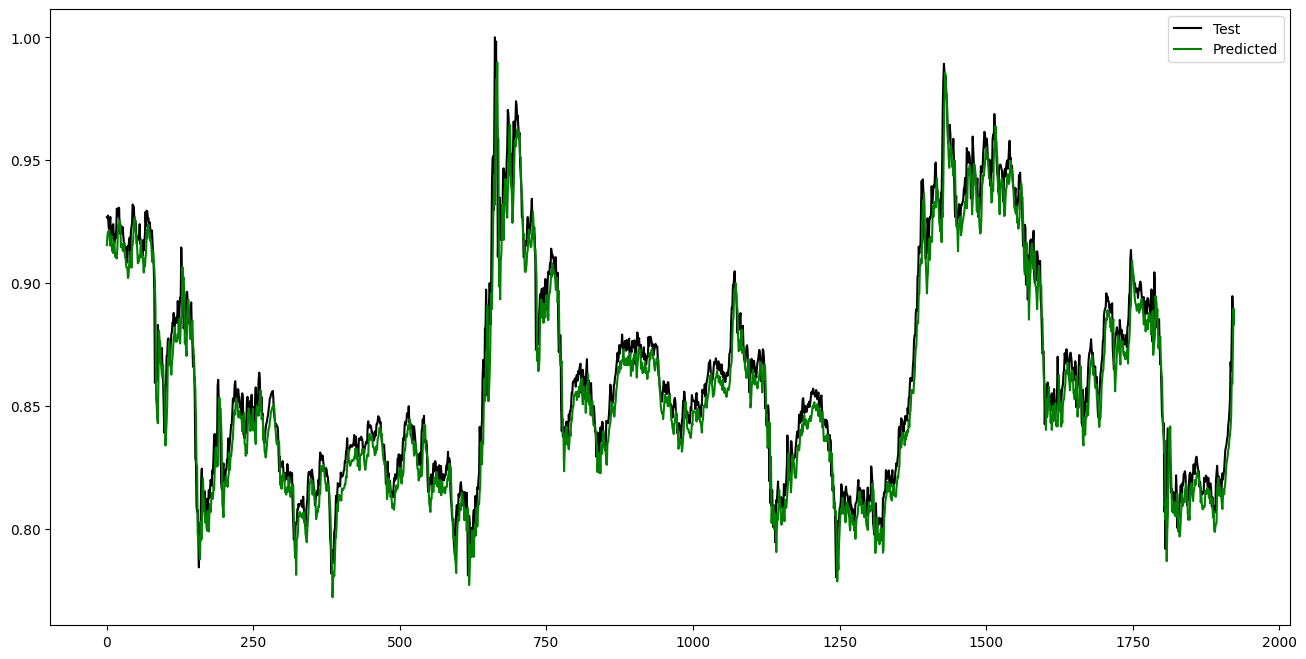

In [60]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'Predicted')
plt.legend()
plt.show()

In [61]:
model.save('trained_model.h5')

/home/nouman/Desktop/Nouman Akram/Jupter Lab/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
